In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:
eth = pd.read_csv('Ethereum Historical Data.csv')

In [4]:
eth


,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 10, 2016",11.75,11.20,11.85,11.07,0.00K,4.91%
1,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%
2,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%
3,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%
4,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-17.05%
...,...,...,...,...,...,...,...
1885,"May 08, 2021",3905.55,3479.81,3952.88,3453.37,1.34M,12.19%
1886,"May 09, 2021",3922.23,3905.69,3979.77,3734.44,1.94M,0.43%
1887,"May 10, 2021",3947.90,3923.48,4203.98,3669.84,2.70M,0.65%
1888,"May 11, 2021",4167.78,3948.66,4177.53,3781.86,1.27M,5.57%


In [5]:
eth.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [6]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1890 non-null   object 
 1   Price     1890 non-null   float64
 2   Open      1890 non-null   float64
 3   High      1890 non-null   float64
 4   Low       1890 non-null   float64
 5   Vol.      1890 non-null   object 
 6   Change %  1890 non-null   object 
dtypes: float64(4), object(3)
memory usage: 103.5+ KB


In [7]:
eth['Vol.'] = eth['Vol.'].replace('-','0')

eth['Vol.'] = (eth['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * eth['Vol.'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))


In [57]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1890 non-null   object 
 1   Price     1890 non-null   float64
 2   Open      1890 non-null   float64
 3   High      1890 non-null   float64
 4   Low       1890 non-null   float64
 5   Vol.      1890 non-null   float64
 6   Change %  1890 non-null   object 
dtypes: float64(5), object(2)
memory usage: 103.5+ KB


In [8]:
eth.Date = eth.Date.astype('datetime64')

In [9]:


def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    
    if '%' in x:
        return float(x.replace('%','')) / 100

eth['Change %'] = eth['Change %'].apply(value_to_float)

In [10]:
eth['Change %']

0       0.0491
1       0.0170
2       0.0812
3       0.1664
4      -0.1705
         ...  
1885    0.1219
1886    0.0043
1887    0.0065
1888    0.0557
1889    0.0176
Name: Change %, Length: 1890, dtype: float64

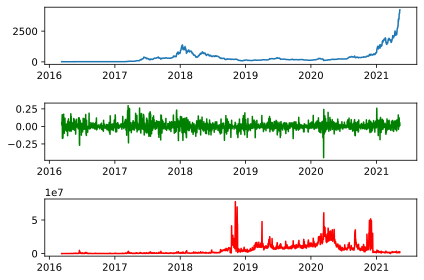

In [83]:


fig, (ax1,ax2,ax3) = plt.subplots(3,1)

ax1.plot(eth['Date'],eth['Price'])
ax2.plot(eth['Date'],eth['Change %'],color = 'g')
ax3.plot(eth['Date'],eth['Vol.'],color = 'r')


fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.tight_layout()
%config InlineBackend.figure_format = 'svg'